<a href="https://colab.research.google.com/github/zahidnubcse/Python/blob/main/Group5_9B_CSE4385.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 749.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 21.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:82: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(
/tmp/ipython-input-4023857554.py:16: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Mounted at /content/drive
test  train
Found 13946 files belonging to 22 classes.
Found 1546 files belonging to 22 classes.
Class names: ['Acne', 'Actinic_Keratosis', 'Benign_tumors', 'Bullous', 'Candidiasis', 'DrugEruption', 'Eczema', 'Infestations_Bites', 'Lichen', 'Lupus', 'Moles', 'Psoriasis', 'Rosacea', 'Seborrh_Keratoses', 'SkinCancer', 'Sun_Sunlight_Damage', 'Tinea', 'Unknown_Normal', 'Vascular_Tumors', 'Vasculitis', 'Vitiligo', 'Warts']


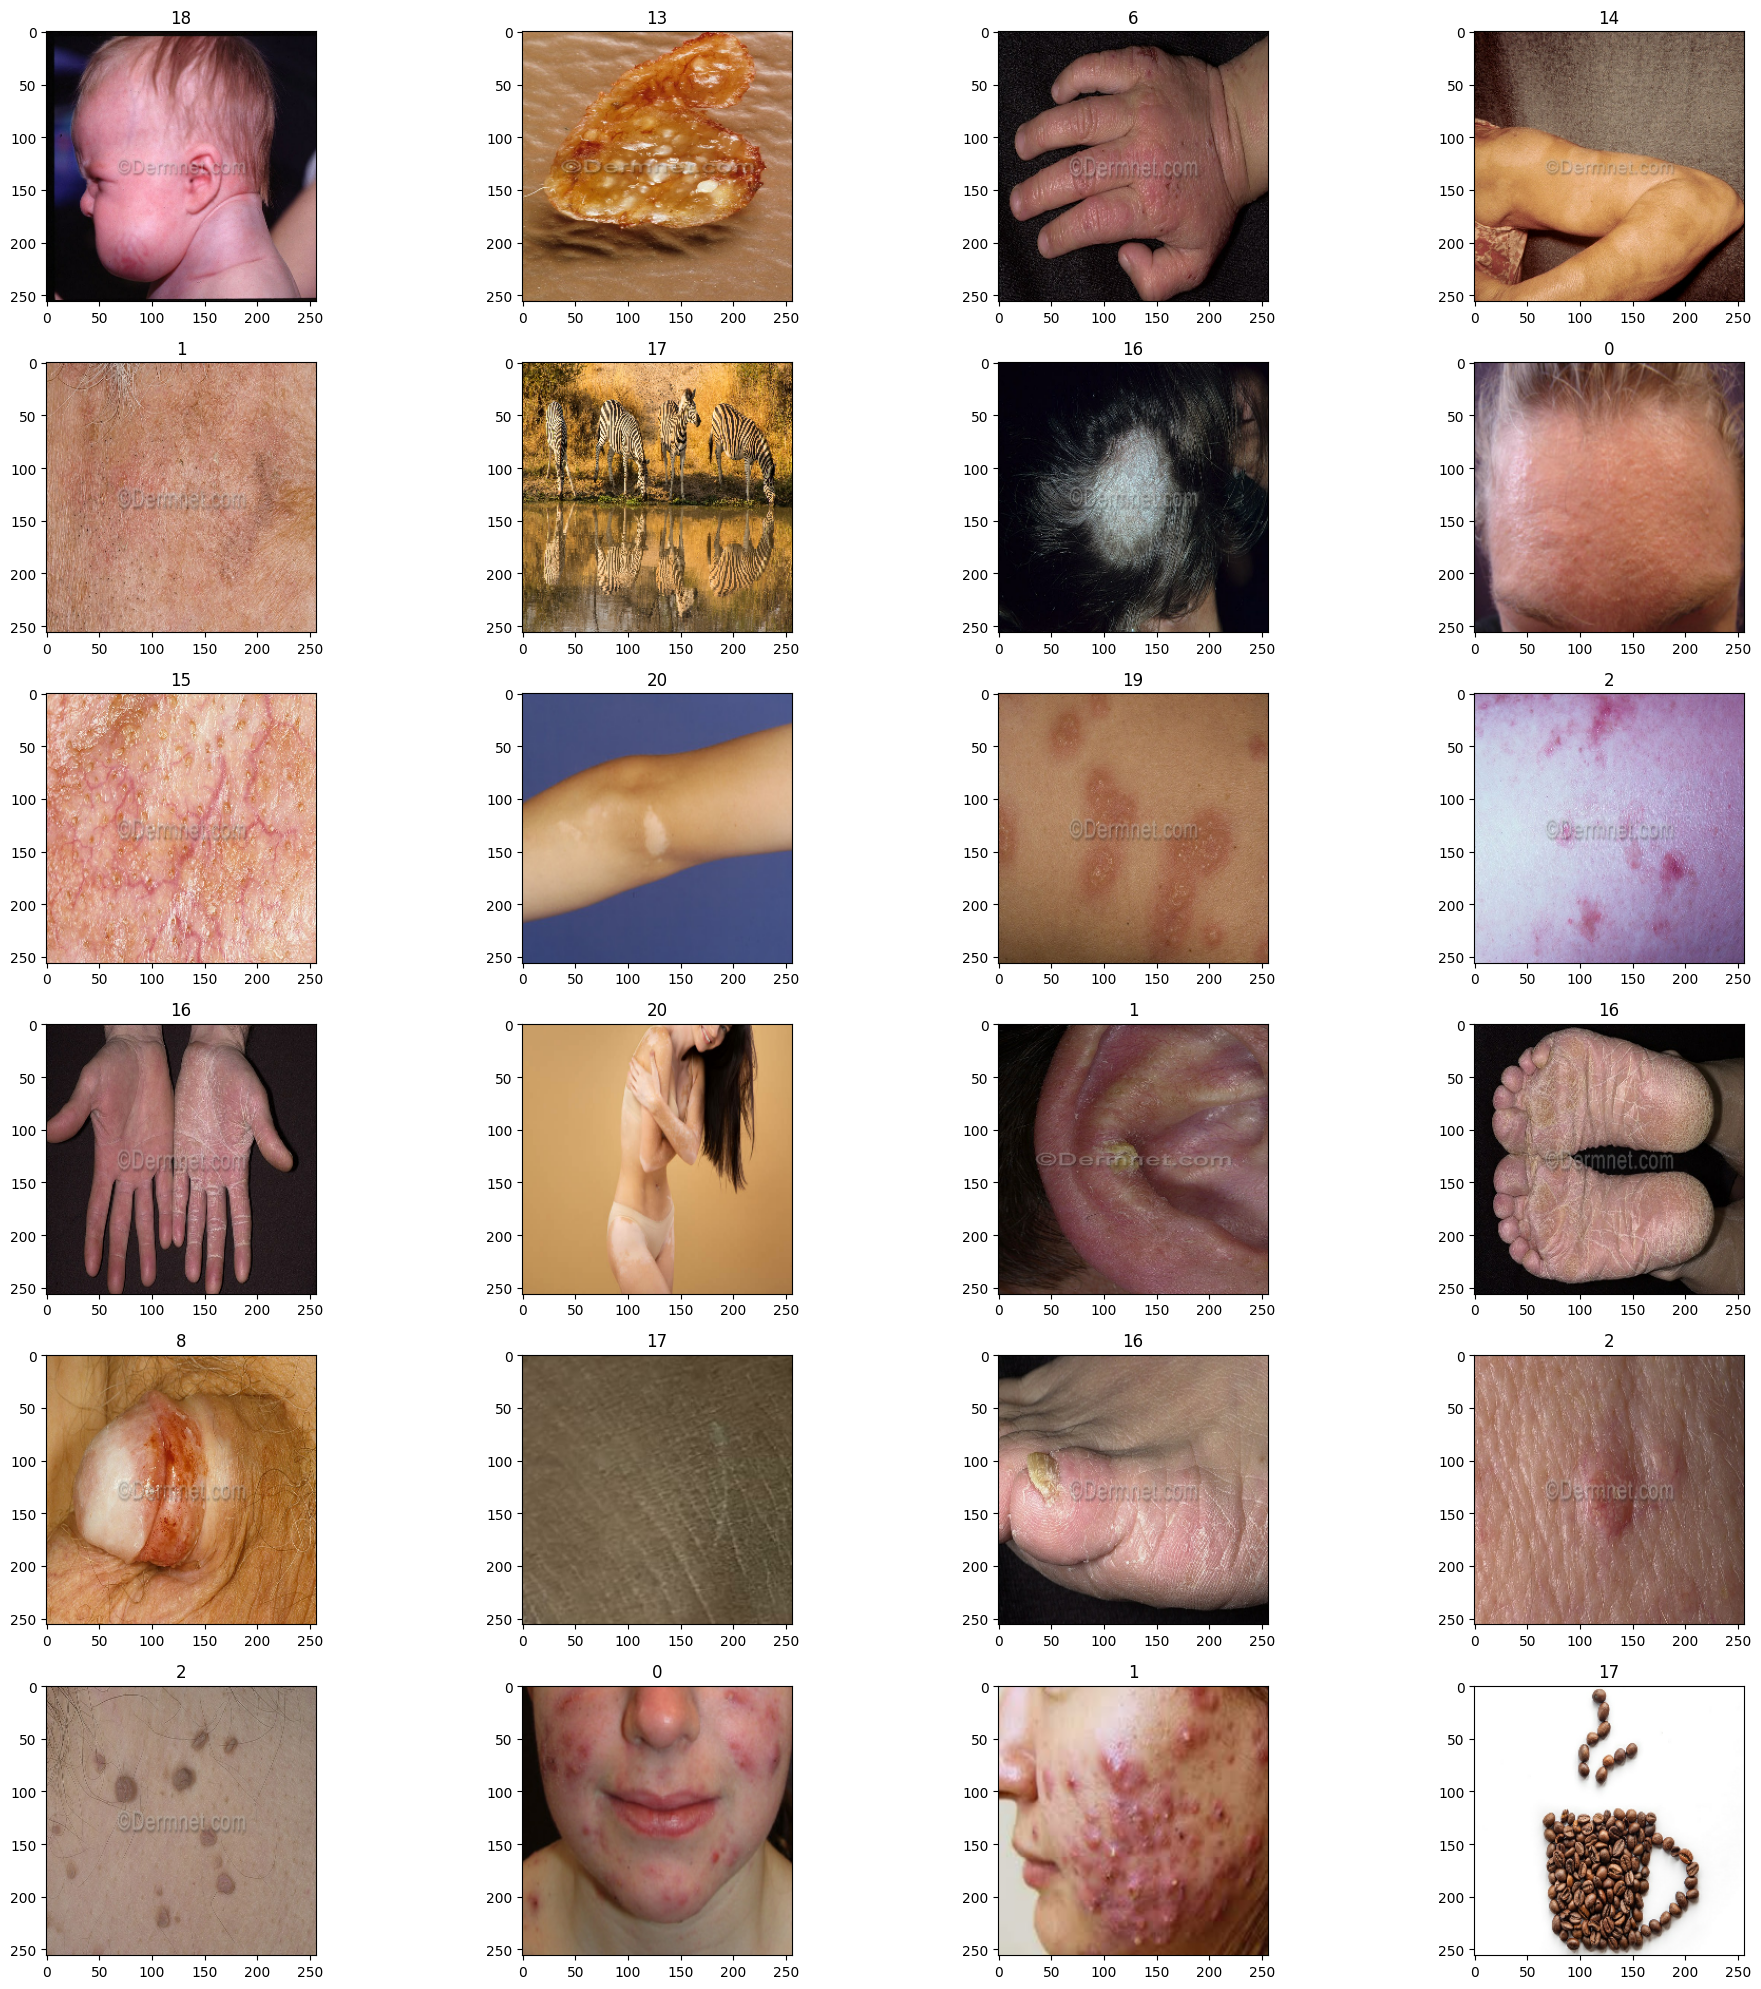

In [ ]:
!pip install tensorflow
!pip install opencv-python


import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Input, RandomRotation, RandomFlip, Resizing, Rescaling, Permute
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import L2
from tensorflow.keras.metrics import SparseCategoricalAccuracy, SparseTopKCategoricalAccuracy
from keras.models import Model
import cv2
import imghdr

# Data Loading
from google.colab import drive
drive.mount('/content/drive')

# Path to your datase
dataset_path = "/content/drive/MyDrive/SkinD/SkinDisease/"
train_dir = dataset_path + "train/"
test_dir  = dataset_path + "test/"

!ls "/content/drive/MyDrive/SkinD/SkinDisease/"

train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

# Get class names
class_names = train_data.class_names
print("Class names:", class_names)

# Data Visualization
train_data_itr = train_data.as_numpy_iterator()
batch = train_data_itr.next()

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:24]):
    row = idx // 4
    col = idx % 4
    ax[row, col].imshow(img.astype(int))
    ax[row, col].title.set_text(str(batch[1][idx]))
plt.tight_layout()
plt.show()

In [ ]:
# Prepare datasets
train_dataset = train_data.prefetch(tf.data.AUTOTUNE)
val_dataset = test_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
try:
    # Try TPU first
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detect TPU
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    # Fallback to GPU/CPU
    strategy = tf.distribute.MirroredStrategy()
    print("Running on GPU/CPU")

print("Number of devices:", strategy.num_replicas_in_sync)


Running on GPU/CPU
Number of devices: 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 252, 252, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 252, 252, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │   123,008,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │         2,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,074,038 (469.49 MB)

 Trainable params: 123,072,678 (469.49 MB)

 Non-trainable params: 1,360 (5.31 KB)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 392s 893ms/step - accuracy: 0.1933 - loss: 3.0473 - top_3_accuracy: 0.3834 - val_accuracy: 0.1449 - val_loss: 3.0542 - val_top_3_accuracy: 0.3325
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 363s 833ms/step - accuracy: 0.2993 - loss: 2.4210 - top_3_accuracy: 0.5449 - val_accuracy: 0.2329 - val_loss: 2.8583 - val_top_3_accuracy: 0.4250
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 365s 836ms/step - accuracy: 0.3539 - loss: 2.1906 - top_3_accuracy: 0.6082 - val_accuracy: 0.3564 - val_loss: 2.2097 - val_top_3_accuracy: 0.6087
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 365s 837ms/step - accuracy: 0.4479 - loss: 1.8987 - top_3_accuracy: 0.6950 - val_accuracy: 0.2180 - val_loss: 2.9590 - val_top_3_accuracy: 0.3926
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 364s 835ms/step - accuracy: 0.5767 - loss: 1.5025 - top_3_accuracy: 0.7980 - val_accuracy: 0.3202 - val_loss: 2.6208 - val_top_3_accuracy: 0.5388
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 364s 834ms/step - accuracy: 0.

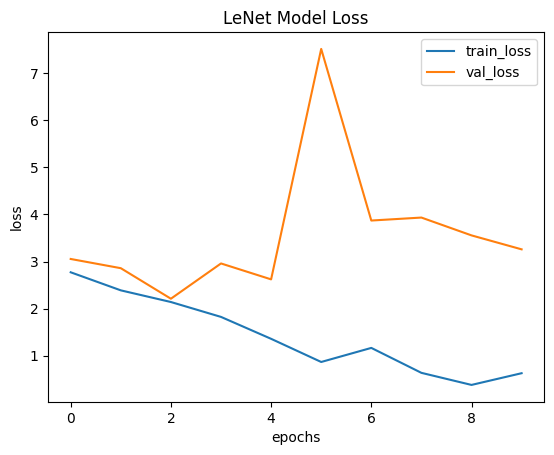

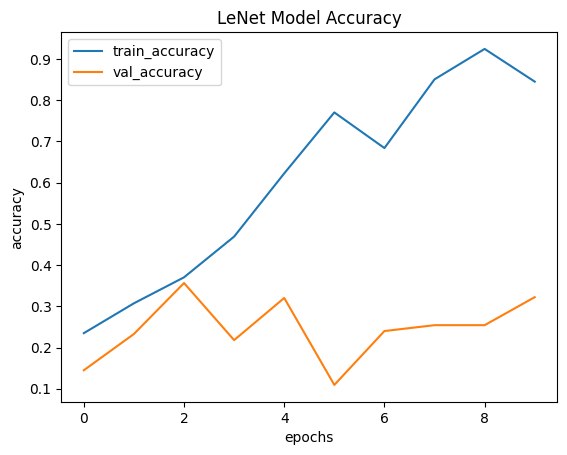

In [ ]:
# LeNet Model
metrics = [SparseCategoricalAccuracy(name="accuracy"), SparseTopKCategoricalAccuracy(k=3, name="top_3_accuracy")]

lenet_model = Sequential([
    InputLayer(input_shape=(256, 256, 3)),
    Rescaling(1./255, name="rescaling"),
    Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='relu', kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, strides=1, padding='valid', activation='relu', kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(500, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(22, activation='softmax')
])

lenet_model.compile(optimizer=Adam(0.001), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=metrics)
lenet_model.summary()

# Train LeNet
lennet_history = lenet_model.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1)
#loss, acc = lenet_model.evaluate(test_data)
#print(f"Test Accuracy: {acc*100:.2f}%")

# Plot results
plt.plot(lennet_history.history['loss'])
plt.plot(lennet_history.history['val_loss'])
plt.title('LeNet Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(lennet_history.history['accuracy'])
plt.plot(lennet_history.history['val_accuracy'])
plt.title('LeNet Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# Try TPU first, else GPU/CPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    strategy = tf.distribute.MirroredStrategy()
    print("Running on GPU/CPU")

print("Number of devices:", strategy.num_replicas_in_sync)

# EfficientNet Model
with strategy.scope():
    backbone = tf.keras.applications.efficientnet_v2.EfficientNetV2L(
        include_top=False,
        weights='imagenet',
        input_shape=(256, 256, 3),
        include_preprocessing=True
    )
    backbone.trainable = False

    metrics = [
        SparseCategoricalAccuracy(name="accuracy"),
        SparseTopKCategoricalAccuracy(k=3, name="top_3_accuracy")
    ]

    func_input = Input(shape=(256, 256, 3))
    x = backbone(func_input)
    x = GlobalAveragePooling2D()(x)
    x = Dense(500, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(100, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(22, activation='softmax')(x)

    func_model = Model(func_input, x, name="func_model")
    func_model.summary()

    func_model.compile(
        Adam(learning_rate=0.01),
        loss=tf.losses.SparseCategoricalCrossentropy(),
        metrics=metrics
    )

# Callbacks
plateau_callback = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    mode='auto',
    min_delta=0.001,
    cooldown=0,
    min_lr=0,
)

# Training
efficient_history = func_model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    verbose=1,
    callbacks=[plateau_callback]
)

# Evaluation
#loss, acc = func_model.evaluate(test_data)
#print(f"Test Accuracy: {acc*100:.2f}%")

# Plot results
plt.plot(efficient_history.history['loss'])
plt.plot(efficient_history.history['val_loss'])
plt.title('EfficientNet Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(efficient_history.history['accuracy'])
plt.plot(efficient_history.history['val_accuracy'])
plt.title('EfficientNet Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


Running on GPU/CPU
Number of devices: 1
473176280/473176280 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "func_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 8, 8, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       640,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 500)            │         2,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        50,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22)             │         2,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,442,070 (451.82 MB)

 Trainable params: 694,022 (2.65 MB)

 Non-trainable params: 117,748,048 (449.17 MB)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1080s 2s/step - accuracy: 0.3156 - loss: 2.3569 - top_3_accuracy: 0.5322 - val_accuracy: 0.4450 - val_loss: 1.7612 - val_top_3_accuracy: 0.7122 - learning_rate: 0.0100
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 1055s 2s/step - accuracy: 0.4373 - loss: 1.8226 - top_3_accuracy: 0.6865 - val_accuracy: 0.4884 - val_loss: 1.6511 - val_top_3_accuracy: 0.7510 - learning_rate: 0.0100
Epoch 3/10
 26/436 ━━━━━━━━━━━━━━━━━━━━ 14:41 2s/step - accuracy: 0.4477 - loss: 1.7410 - top_3_accuracy: 0.6998

In [ ]:
# Install transformers (only once)
!pip install transformers

from transformers import TFViTModel

# Preprocessing
resize_rescale_hf = tf.keras.Sequential([
    Resizing(224, 224),
    Rescaling(1./225),
    Permute((3, 1, 2))
])

# Detect TPU/GPU/CPU
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("Running on TPU")
except ValueError:
    strategy = tf.distribute.MirroredStrategy()
    print("Running on GPU/CPU")

print("Number of devices:", strategy.num_replicas_in_sync)

with strategy.scope():
    metrics = [
        SparseCategoricalAccuracy(name="accuracy"),
        SparseTopKCategoricalAccuracy(k=3, name="top_3_accuracy")
    ]

    # Load ViT base model
    base_model = TFViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

    inputs = Input(shape=(256, 256, 3))
    x = resize_rescale_hf(inputs)
    x = base_model.vit(x)[0][:, 0, :]   # CLS token
    outputs = Dense(23, activation="softmax")(x)
    hf_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    hf_model.summary()

    # Compile
    hf_model.compile(
        Adam(learning_rate=5e-5),
        loss=tf.losses.SparseCategoricalCrossentropy(),
        metrics=metrics
    )

# Train
vit_history = hf_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    verbose=1
)

# Plot results
plt.plot(vit_history.history['loss'])
plt.plot(vit_history.history['val_loss'])
plt.title('ViT Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

plt.plot(vit_history.history['accuracy'])
plt.plot(vit_history.history['val_accuracy'])
plt.title('ViT Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


In [ ]:
# Performance Comparison - Loss
def loss(history, label, color):
    epochs = range(len(history.history['loss']))
    plt.plot(epochs, history.history['loss'], label=f'{label} Train Loss', color=color)
    plt.plot(epochs, history.history['val_loss'], label=f'{label} Val Loss', linestyle='--', color=color)
    plt.annotate(f'{label} Train', xy=(epochs[-1], history.history['loss'][-1]), xytext=(-35, 5),
                 textcoords='offset points', color=color, fontsize='small')
    plt.annotate(f'{label} Val', xy=(epochs[-1], history.history['val_loss'][-1]), xytext=(-35, 5),
                 textcoords='offset points', color=color, fontsize='small')

plt.figure(figsize=(15, 6))
loss(vit_history, 'ViT', 'blue')
loss(efficient_history, 'EfficientNet', 'green')
loss(lennet_history, 'LeNet', 'red')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Performance Comparison - Accuracy
def accuracy(history, label, color):
    epochs = range(len(history.history['accuracy']))
    plt.plot(epochs, history.history['accuracy'], label=f'{label} Train Accuracy', color=color)
    plt.plot(epochs, history.history['val_accuracy'], label=f'{label} Val Accuracy', linestyle='--', color=color)
    plt.annotate(f'{label} Train', xy=(epochs[-1], history.history['accuracy'][-1]), xytext=(-35, 5),
                 textcoords='offset points', color=color, fontsize='small')
    plt.annotate(f'{label} Val', xy=(epochs[-1], history.history['val_accuracy'][-1]), xytext=(-35, 5),
                 textcoords='offset points', color=color, fontsize='small')

plt.figure(figsize=(15, 6))
accuracy(vit_history, 'ViT', 'blue')
accuracy(efficient_history, 'EfficientNet', 'green')
accuracy(lennet_history, 'LeNet', 'red')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()